In [28]:
import util

In [29]:
import pandas as pd
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("WorldStrat Dataset.csv", index_col=0)
df

,n,bounds,lowres_date,highres_date,area,cloud_cover,delta,lon,lat,LCCS,SMOD,IPCC Class,LCCS class,SMOD Class
Amnesty POI-10-1-1,1,"[105.84161265950597, 13.147748954631947, 105.8...",2019-01-06,2019-01-27,2.5,0.06,-21,105.848905,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-1,2,"[105.84161265950597, 13.147748954631947, 105.8...",2019-02-15,2019-01-27,2.5,0.15,19,105.848905,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-1,3,"[105.84161265950597, 13.147748954631947, 105.8...",2019-01-31,2019-01-27,2.5,6.26,4,105.848905,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-1,4,"[105.84161265950597, 13.147748954631947, 105.8...",2018-12-17,2019-01-27,2.5,0.73,-41,105.848905,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-1,5,"[105.84161265950597, 13.147748954631947, 105.8...",2018-12-02,2019-01-27,2.5,0.11,-56,105.848905,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNHCR-BRAs003173,12,"[-41.973930307054175, -12.04047654642226, -41....",2018-09-26,2018-09-23,2.5,5.12,3,-41.966670,-12.033330,120,11,Other,Shrubland,Rural: Very Low Dens
UNHCR-BRAs003173,13,"[-41.973930307054175, -12.04047654642226, -41....",2018-09-26,2018-09-23,2.5,5.12,3,-41.966670,-12.033330,120,11,Other,Shrubland,Rural: Very Low Dens
UNHCR-BRAs003173,14,"[-41.973930307054175, -12.04047654642226, -41....",2018-10-11,2018-09-23,2.5,0.31,18,-41.966670,-12.033330,120,11,Other,Shrubland,Rural: Very Low Dens
UNHCR-BRAs003173,15,"[-41.973930307054175, -12.04047654642226, -41....",2018-10-11,2018-09-23,2.5,0.31,18,-41.966670,-12.033330,120,11,Other,Shrubland,Rural: Very Low Dens


In [31]:
df = df.loc[~df.index.duplicated(keep='first')]
df

,n,bounds,lowres_date,highres_date,area,cloud_cover,delta,lon,lat,LCCS,SMOD,IPCC Class,LCCS class,SMOD Class
Amnesty POI-10-1-1,1,"[105.84161265950597, 13.147748954631947, 105.8...",2019-01-06,2019-01-27,2.5,0.06,-21,105.848905,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-2,1,"[105.84161265950597, 13.162040839281076, 105.8...",2019-01-06,2019-01-27,2.5,0.06,-21,105.848905,13.169187,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-3,1,"[105.84161265950597, 13.176332723930203, 105.8...",2019-01-06,2019-01-27,2.5,0.06,-21,105.848905,13.183479,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-2-1,1,"[105.8561973580532, 13.147748954631947, 105.87...",2019-01-06,2019-01-27,2.5,0.06,-21,105.863490,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-2-2,1,"[105.8561973580532, 13.162040839281076, 105.87...",2019-01-06,2019-01-27,2.5,0.06,-21,105.863490,13.169187,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNHCR-NGAs035354,1,"[13.778820599146073, 11.218193050313346, 13.79...",2017-11-05,2017-11-08,2.5,0.00,-3,13.786060,11.225340,190,11,Settlement,Urban areas,Rural: Very Low Dens
UNHCR-MMRs035425,1,"[93.47666334949932, 20.0770397931716, 93.49178...",2021-04-18,2021-04-18,2.5,0.31,0,93.484222,20.084181,40,11,Agriculture,"Mosaic natural vegetation (tree, shrub, herbac...",Rural: Very Low Dens
UNHCR-CMRs004018,1,"[14.592949197448435, 6.726291317447426, 14.607...",2019-12-05,2019-12-10,2.5,0.00,-5,14.600100,6.733440,62,11,Forest,"Tree cover, broadleaved, deciduous, open (15‐40%)",Rural: Very Low Dens
UNHCR-CMRs004005,1,"[14.942548959144071, 6.742551322195224, 14.956...",2018-12-10,2018-10-20,2.5,0.00,51,14.949700,6.749700,190,23,Settlement,Urban areas,Urban: Dense


In [32]:
print(len(df))
df['SMOD Class'].value_counts()

3928


Rural: Very Low Dens    2207
Urban: Centre            582
Rural: Low Dens          323
Urban: Suburban          265
Urban: Dense             200
Rural: cluster           164
Urban: Semi-dense         98
Water                     89
Name: SMOD Class, dtype: int64

<Axes: >

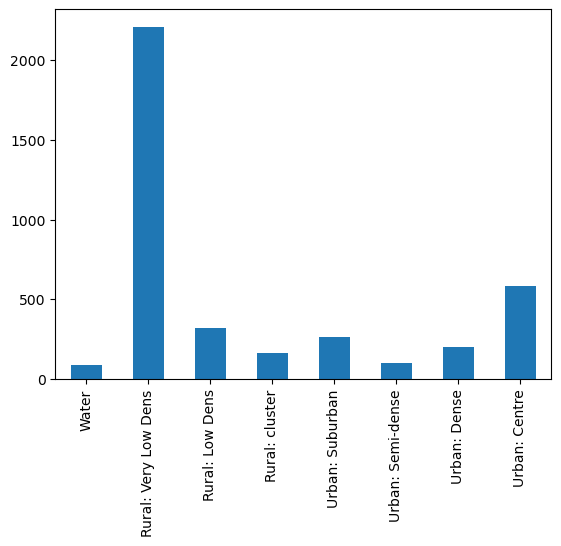

In [33]:
df["SMOD Class"].value_counts().reindex(['Water', 'Rural: Very Low Dens', 'Rural: Low Dens', 'Rural: cluster', 'Urban: Suburban', 
                                            'Urban: Semi-dense', 'Urban: Dense', 'Urban: Centre']).plot(kind='bar')
# df['SMOD Class'].value_counts().plot(kind='bar')

In [35]:
# util.save_high_res()

3889it [02:32, 25.49it/s]


In [36]:
high_res = np.load("high_res.npy")

In [37]:
y, train, val, test = util.get_labels_and_split()
y_train, y_val, y_test = y[train], y[val], y[test]

In [51]:
high_res_mean = high_res.mean(axis=1)
high_res_mean

array([[[ 6.366,  8.79 ,  6.202],
        [ 6.33 ,  8.75 ,  6.174],
        [ 6.218,  8.638,  6.038],
        ...,
        [ 5.15 ,  7.266,  5.012],
        [ 5.242,  7.386,  5.128],
        [ 5.328,  7.498,  5.22 ]],

       [[ 3.944,  6.088,  4.174],
        [ 3.938,  6.102,  4.15 ],
        [ 3.936,  6.048,  4.104],
        ...,
        [ 4.028,  6.106,  3.96 ],
        [ 4.12 ,  6.218,  4.028],
        [ 4.132,  6.158,  4.026]],

       [[ 3.65 ,  5.724,  3.79 ],
        [ 3.618,  5.698,  3.756],
        [ 3.672,  5.798,  3.854],
        ...,
        [ 4.156,  6.206,  4.174],
        [ 4.148,  6.182,  4.202],
        [ 4.154,  6.23 ,  4.188]],

       ...,

       [[90.366, 89.004, 95.476],
        [94.402, 93.552, 95.346],
        [98.306, 97.858, 95.002],
        ...,
        [95.928, 98.064, 92.54 ],
        [95.76 , 97.898, 92.348],
        [95.342, 97.486, 91.984]],

       [[12.504, 12.318, 10.578],
        [12.458, 12.254, 10.506],
        [12.878, 12.62 , 10.834],
        .

In [48]:
high_res_mean_real = high_res_mean.mean(axis=1)
high_res_mean_real

array([[ 5.26882 ,  7.484776,  5.146744],
       [ 3.93088 ,  5.969892,  3.893532],
       [ 3.7275  ,  5.772296,  3.919716],
       ...,
       [87.702068, 88.82524 , 83.34076 ],
       [11.947784, 12.161552, 10.592608],
       [18.518568, 15.454892, 11.928908]])

In [78]:
high_res.shape

(3889, 500, 500, 3)

In [64]:
a = high_res.mean(axis=0)
a.shape

(500, 500, 3)

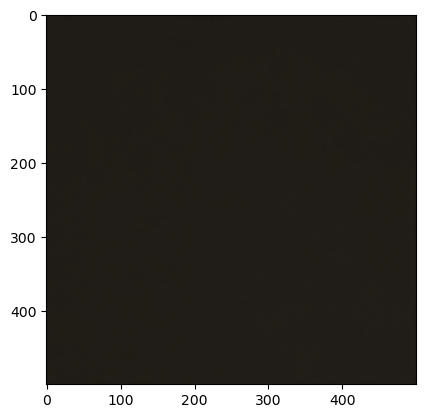

In [65]:
a = a.astype(int)
plt.imshow(a)


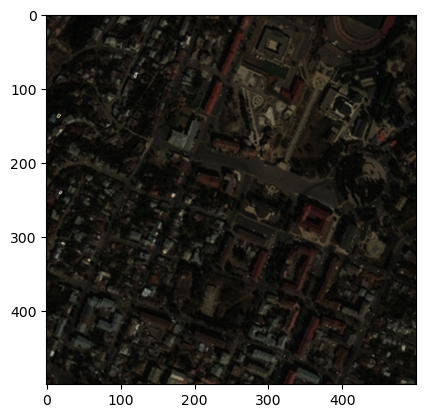

In [77]:
plt.imshow(high_res[100])

In [82]:
low_res = np.load('low_res.npy')

In [83]:
low_res.shape

(3889, 147, 147, 3)

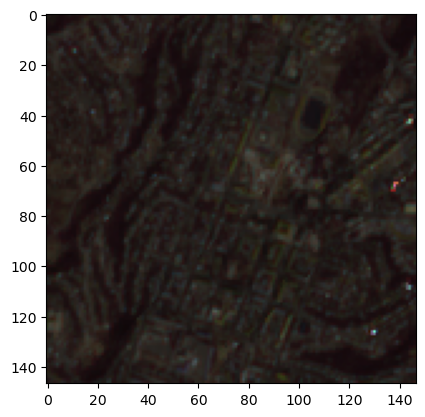

In [84]:
plt.imshow(low_res[100])

In [ ]:
X_train = high_res_mean_real[train]
X_val = high_res_mean_real[val]
X_test = high_res_mean_real[test]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial', max_iter=5000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial')

In [ ]:
predictions = lr.predict(X_val)

In [ ]:
(predictions == y_val).mean()

0.5440414507772021

In [ ]:
(1 == y_val).mean()

0.5544041450777202

In [ ]:
labels = util.get_labels()

In [ ]:
labels.loc['ASMSpotter-1-1-1']

KeyError: 'ASMSpotter-1-1-1'

In [ ]:
import tqdm
import tifffile
import pandas as pd
import numpy as np

In [ ]:
labels = util.get_labels()
labels = labels.drop("ASMSpotter-1-1-1")
low_res = []
for index, row in labels.iterrows():
    image = tifffile.imread(f"{row['split']}_split/{index}/{index}-1-L2A_data.tiff")
    arr = np.array([image[:, :, 4], image[:, :, 3], image[:, :, 2]])
    img = (np.transpose(arr, (1,2,0)) * 256).astype('uint8')
    low_res.append(img)

KeyboardInterrupt: 